## **Introduction**
The code is analyzing the Movie Data Set, which is a database about movies from all years starting from 1966 till 2015 with important statics like revenu, genra , date of relase and ...etc
the goal of analysis is to find the relatons between this by adreesing related questions.

# **Questions**
expected question to be disscused are:
1. What is the total profit by decade
2. What is the distribution of runtime in movies?
3. How many movies are released each month?
4. How many movies are there for each duration category?
5. Is there a correlation between popularity and revenue?




# **Import libiraries and clean data**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('tmdb-movies.csv')

# Data cleaning and preprocessing
# Drop irrelevant columns that will not help
df = df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis=1)

# Convert release_date column to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Extract the release month from the release_date column
df['release_month'] = df['release_date'].dt.month

df.dropna(subset=['revenue', 'popularity'], inplace=True)
df = df[df['revenue'] > 0]  # Remove rows with zero or negative numbers.
df = df[df['popularity'] > 0]  # Remove rows with zero or negative numbers.

# Function to categorize movie duration
def categorize_duration(duration):
    if duration <= 60:
        return 'Short'
    elif duration <= 120:
        return 'Medium'
    else:
        return 'Long'

# Apply categorize_duration function to create a new column
df['duration_category'] = df['runtime'].apply(categorize_duration)

# Drop rows with missing values in relevant columns
df = df.dropna(subset=['revenue', 'genres', 'runtime'])

# Convert budget, revenue, budget_adj, and revenue_adj columns to integers
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df['budget_adj'] = df['budget_adj'].astype(int)
df['revenue_adj'] = df['revenue_adj'].astype(int)

<ipython-input-16-4a4b4e7d7d39>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_date'] = pd.to_datetime(df['release_date'])


# **Statistical Analysis**

In [17]:
mean_revenue = df['revenue'].mean()
median_popularity = df['popularity'].median()
std_dev_runtime = df['runtime'].std()

print(f"Mean Revenue: {mean_revenue}")
print(f"Median Popularity: {median_popularity}")
print(f"Standard Deviation of Runtime: {std_dev_runtime}")

Mean Revenue: 89220658.32474227
Median Popularity: 0.6802889999999999
Standard Deviation of Runtime: 21.11284713321479




1.What is the total profit by decade?

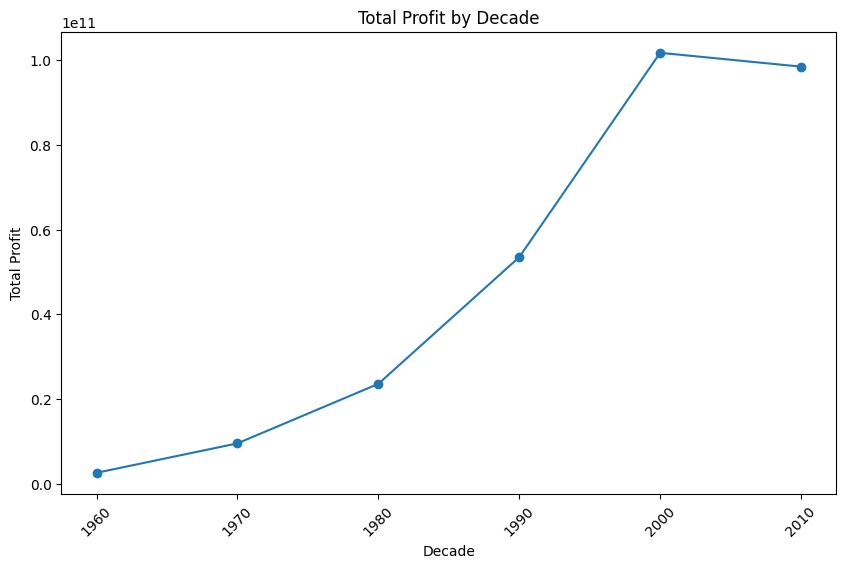

In [18]:
# Calculate profit (revenue - budget)
df['profit'] = df['revenue'] - df['budget']

# Extract the decade from the release_year column
df['decade'] = (df['release_year'] // 10) * 10

# Group data by decade and calculate the sum of profits
decade_profit = df.groupby('decade')['profit'].sum()

# Plot the total profit by decade
plt.figure(figsize=(10, 6))
decade_profit.plot(kind='line', marker='o')
plt.title('Total Profit by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.show()

#from the graph it is shown that the total profit of movie is increasing by years, and it's highest is in 2000 to 2010.

2.What is the distribution of runtime in movies?

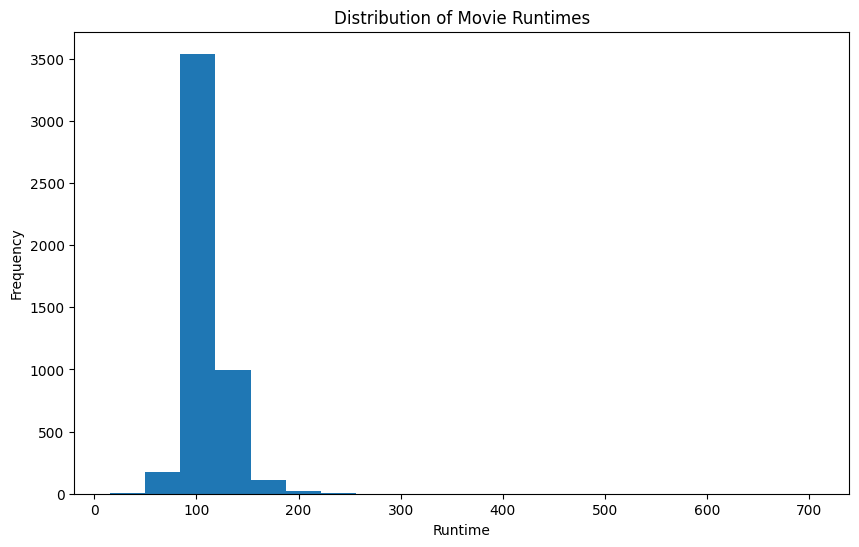

In [19]:
# Distribution of runtime in movies
df['runtime'].plot(kind='hist', bins=20, figsize=(10, 6))
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Runtimes')
plt.show()

# from the graph it is shown that the highest frequent of runtime of movie is 3500, which is very high compared to other runtimes, makinh it an outlier.

3.How many movies are released each month?

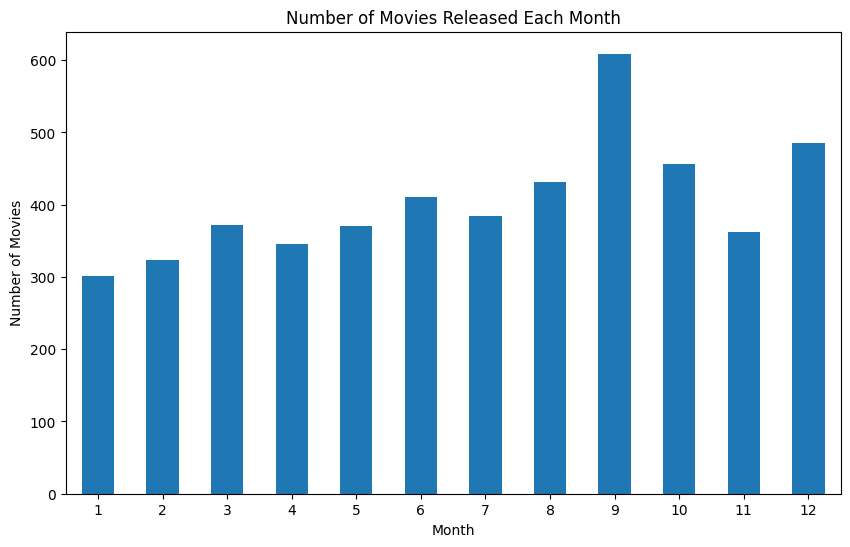

In [20]:
# Count the number of movies released each month
monthly_movies = df['release_month'].value_counts().sort_index() # Replace 'data' with 'df' if you intended to use the DataFrame from previous cells

# Plot the number of movies released each month
plt.figure(figsize=(10, 6))
monthly_movies.plot(kind='bar')
plt.title('Number of Movies Released Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Movies')
plt.xticks(rotation=0)
plt.show()

#from the graph it is shown that the most movies is relased at sepetember as being near the vacation amd the season of the end of the year and with autumn Moderate weather compared to the rest of the year, making it best phase for releasing a movie.

4.How many movies are there for each duration category?

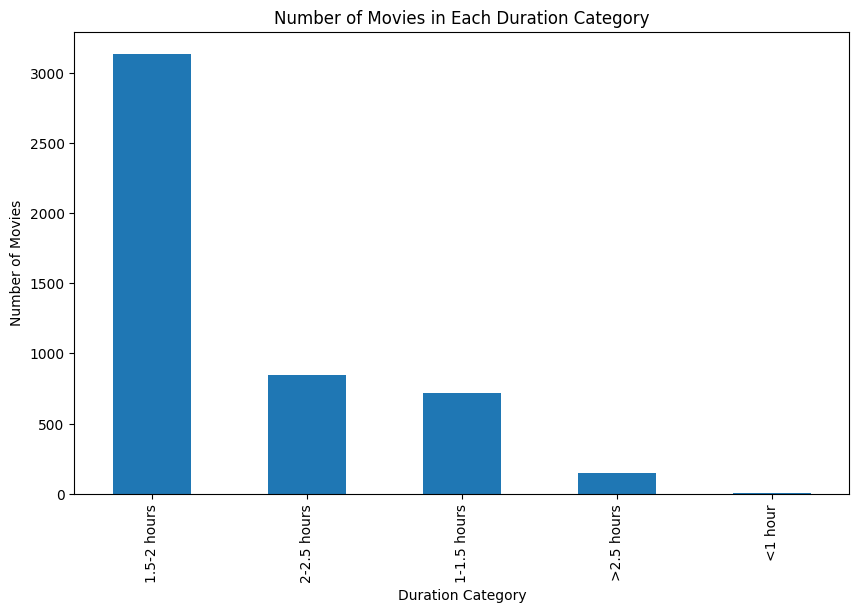

In [21]:

duration_bins = [0, 60, 90, 120, 150, np.inf]
duration_labels = ['<1 hour', '1-1.5 hours', '1.5-2 hours', '2-2.5 hours', '>2.5 hours']
df['duration_category'] = pd.cut(df['runtime'], bins=duration_bins, labels=duration_labels)
duration_counts = df['duration_category'].value_counts()
duration_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Duration Category')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Duration Category')
plt.show()

# from the graph it is shown that the there are 3000 movie for duration 1.5-2hr, which is the highest.There are 3000 movie for duration 1-1.5hr.There are 1000 movie for duration 1.5-2hr.There are less than 1000 movie for duration 2.5hr.There are nearly zero movie for duration less than 1hr, which is the lowest.

<Figure size 1200x600 with 0 Axes>

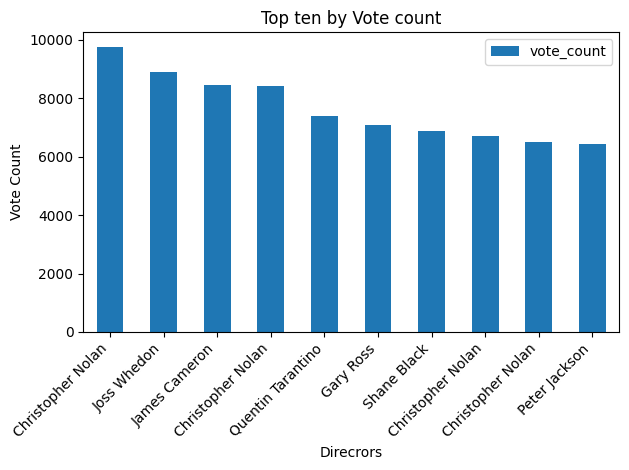

In [22]:
#Who is the top director with the higest popularity?
df_sorted = df.sort_values(by='vote_count', ascending=False)

#getting the top 10 sorted values
top_ten = df_sorted.head(10)

#plotting it
plt.figure(figsize=(12,6))
ax= top_ten.plot(kind='bar', x='director',y='vote_count')
ax.set_xticklabels(top_ten['director'], rotation=45 ,ha='right')
plt.xlabel('Direcrors')
plt.ylabel('Vote Count')
plt.title('Top ten by Vote count')
plt.tight_layout()
plt.show()

# from the graph it is shown that the highest rated director is Christopher Nolan by more than 10000 votes compared to the others.

6.Is there a correlation between popularity and revenue?

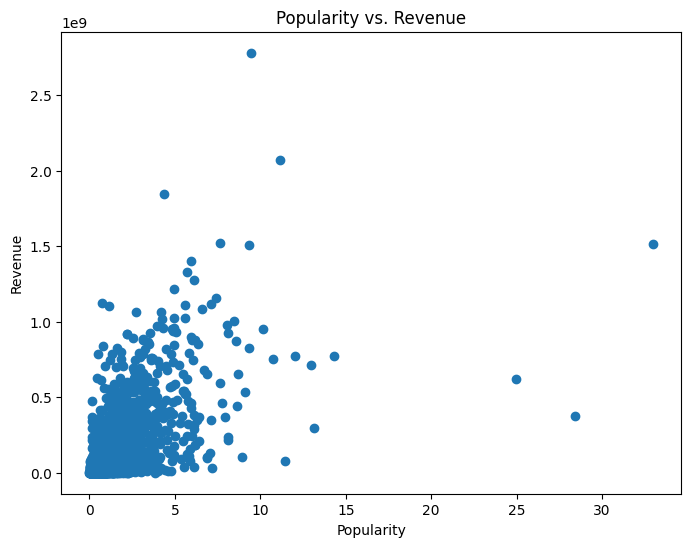

In [24]:

# Calculate the correlation coefficient between popularity and revenue
correlation = df['popularity'].corr(df['revenue'])

# Plot a scatter plot of popularity vs. revenue
plt.figure(figsize=(8, 6))
plt.scatter(df['popularity'], df['revenue'])
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()


# **Conclusions**
It's been concluded out of analysis the answers of the following questions is:
1. What is the total profit by decade:
  * the total profit of movie is increasing by years, ranges between 0.1 t0 1.0, and it's highest is in 2000 to 2010.

2. What is the distribution of runtime in movies?
  * the highest frequent of runtime of movie is 3500, which is very high
      compared to other runtimes

3. How many movies are released each month?
  * the number of movies varies from month to other, but most movies varies between 700 to 1000 movie per month, with septemeber be the highest with 1200 movie.

4. How many movies are there for each duration category?
   * There are 3000 movie for duration 1.5-2hr, which is the highest.There are 3000 movie for duration 1-1.5hr.There are 1000 movie for duration 1.5-2hr.There are less than 1000 movie for duration 2.5hr.There are nearly zero movie for duration less than 1hr, which is the lowest.

5. Is there a correlation between popularity and revenue?
   * There is no clear relation between the popularity and revenue.
6. Who is the top director with the higest popularity?
   * Christopher Nolan is the director with the higest popularity.





# **Limitations**
there are few limitations that have been seen in this database:
1. Limited Time Frame: The database appears to cover movies released in the year 2015. It does not provide a comprehensive view of movies from other years, limiting the scope of analysis to a specific time period.

2. Data Quality: The accuracy and reliability of the data in the database may vary. There could be errors, inconsistencies, or outdated information, which can affect the validity of any analysis or research conducted using this data.

3. Limited Variables: The provided database includes only a specific set of variables, such as movie title, cast, budget, revenue, genres, and production companies. It may lack other important variables that could be relevant for more in-depth analysis, such as critical reviews, audience ratings, or demographic information.

4. Lack of Contextual Information: The database may not include contextual information about the movies, such as cultural significance, release strategies, marketing campaigns, or external factors that could impact a movie's performance. This limits the ability to fully understand the dynamics behind the success or failure of a movie.

5. Data Preprocessing Required: Depending on the specific analysis or research goals, the raw data in the database may require preprocessing, cleaning, or transformation to make it suitable for analysis. This additional effort and manipulation can introduce potential biases or errors if not handled properly.
